   # Learning Python

## Database with Python

In [3]:
# Python Version
from platform import python_version
print(python_version())

3.8.5


In [4]:
import os

In [5]:
os.remove('library.db') if os.path.exists('library.db') else None

In [6]:
import sqlite3

In [7]:
con = sqlite3.connect('library.db')

In [8]:
type(con)

sqlite3.Connection

In [9]:
cursor = con.cursor()

In [10]:
type(cursor)

sqlite3.Cursor

In [11]:
sql_create = 'create table author (id integer primary key, name varchar(100))'

In [12]:
cursor.execute(sql_create)

In [13]:
sql_insert = 'insert into author values (?,?)'

In [14]:
set_author = [(1000, 'J. K. Rowling'), (1001, 'George R. R. Martin'), (1002, 'J. R. R. Tolkien')]

In [15]:
for x in set_author:
    cursor.execute(sql_insert, x)

In [16]:
con.commit()

In [17]:
sql_select = 'select * from author'      

In [18]:
cursor.execute(sql_select)

In [19]:
data = cursor.fetchall()

In [20]:
for x in data:
    print(x)

(1000, 'J. K. Rowling')
(1001, 'George R. R. Martin')
(1002, 'J. R. R. Tolkien')


In [21]:
def data_insert(id, name):
    cursor.execute(sql_insert, (id, name))
    con.commit()

In [22]:
data_insert(1003, "Paulo Coelho")

In [23]:
def data_select():
    cursor.execute("select * from author where name = 'Paulo Coelho'")
    for x in cursor.fetchall():
        print(x[1])

In [24]:
data_select()

Paulo Coelho


In [25]:
con.close()

In [26]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [27]:
os.remove('words.db') if os.path.exists('words.db') else None
conn = sqlite3.connect('words.db')
c = conn.cursor()
c.execute('CREATE TABLE words(id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, word varchar(50), tam REAL)')

In [28]:
def readFile():
    with open('hangman/words.txt', 'rt') as file:
        words = file.readlines()
    return words

In [29]:
def insert_words():
    conn = sqlite3.connect('words.db')
    c = conn.cursor()
    
    for word in readFile():
        c.execute("INSERT INTO words (word, tam) VALUES(?, ?)", (word.strip(), len(word.strip())))
        conn.commit()
    
    c.close()
    conn.close()
    print("Finish")

In [30]:
insert_words()

Finish


In [33]:
def dados_grafico():
    conn = sqlite3.connect('words.db')
    c = conn.cursor()
    
    c.execute("SELECT word, tam FROM words where id < 15")
    ids = []
    values = []
    for row in c.fetchall():
        ids.append(row[0])
        values.append(row[1])
        
    plt.bar(ids, values)
    plt.show()
    
    c.close()
    conn.close()

<IPython.core.display.Javascript object>


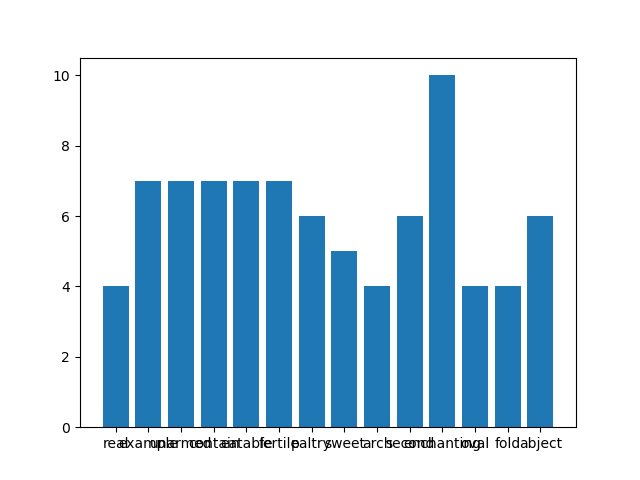

In [34]:
dados_grafico()